# Explore data augmentation 
As the notebook exploring a simple CNN showed, the model overfits the training data. To improve generalization, we can augment the training data. Data augmentation creates new training examples through applying small modifications to the original training images. Examples of such modifications are cropping, rotation, or flipping. Data augnmentation helps in similating slight variability in real world data, so that the model is able to generalize better on unseen data.

Data augmentation should only be applied to the training dataset and not to the validation and test set, because during validation and testing, we want to measure performance on data that resembles unaltered, realistic inputs.

In Pytorch, defining a dataset using torchvision.transforms, the augmentation is applied each time an image is loaded during training. Every epoch (and every batch) the model sees slightly different versions of the same training images. Thus, when the augmentation is applied, the number of training samples per epoch stays the same (namely the number of images in the original, un-augmented training set), but the model sees a slightly different version of each image every time it is loaded. As a result, the model sees more variety over multiple epochs.

## import required libraries

In [6]:
import os
import sys
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from pathlib import Path
from torchvision.utils import make_grid
from torchvision.transforms import v2
import torch
module_path = os.path.abspath(os.path.join('..')) # project root
# add project root to sys.path
if module_path not in sys.path:
    sys.path.append(module_path) 
from src.data_loader import get_dataloader
from src.transforms import get_train_transforms

## load random images without data augmentation
No data augmentation, only resize

Feature batch shape: torch.Size([16, 3, 224, 224])
Labels batch shape: torch.Size([16])
Label: [1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0]


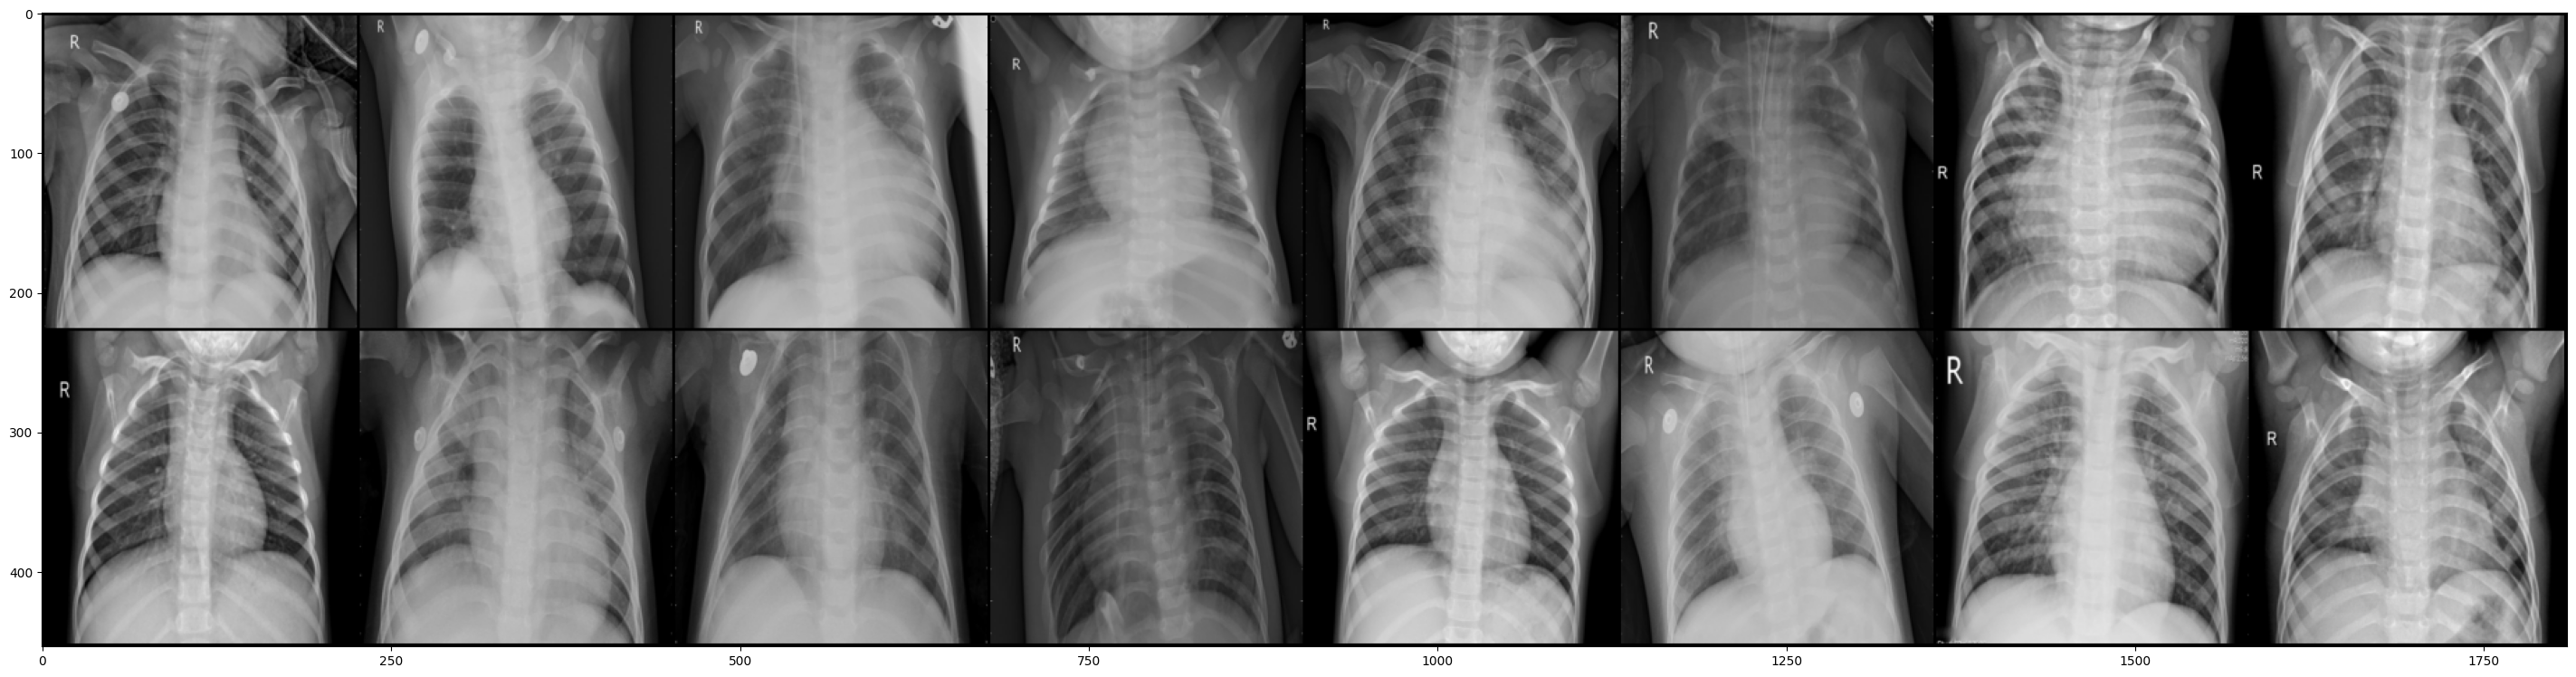

In [7]:
base_data_dir = Path("../data/raw/chest_xray")
image_size = 224
batch_size=16
transform = v2.Compose([v2.ToImage(),
                        v2.Resize((image_size,image_size)),
                        v2.ToDtype(torch.float32, scale=True)])
train_dataloader = get_dataloader(os.path.join(base_data_dir,'train'),batch_size,num_workers=0,transform=transform)

# grab the first batch of n images
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
# Print the labels
print('Label:', train_labels.numpy())

im = make_grid(train_features, nrow=8)
plt.figure(figsize=(36,12))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))


No data augmentation, only resize, convert to grayscale and normalize

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9764707].


Feature batch shape: torch.Size([16, 1, 224, 224])
Labels batch shape: torch.Size([16])
Label: [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0]


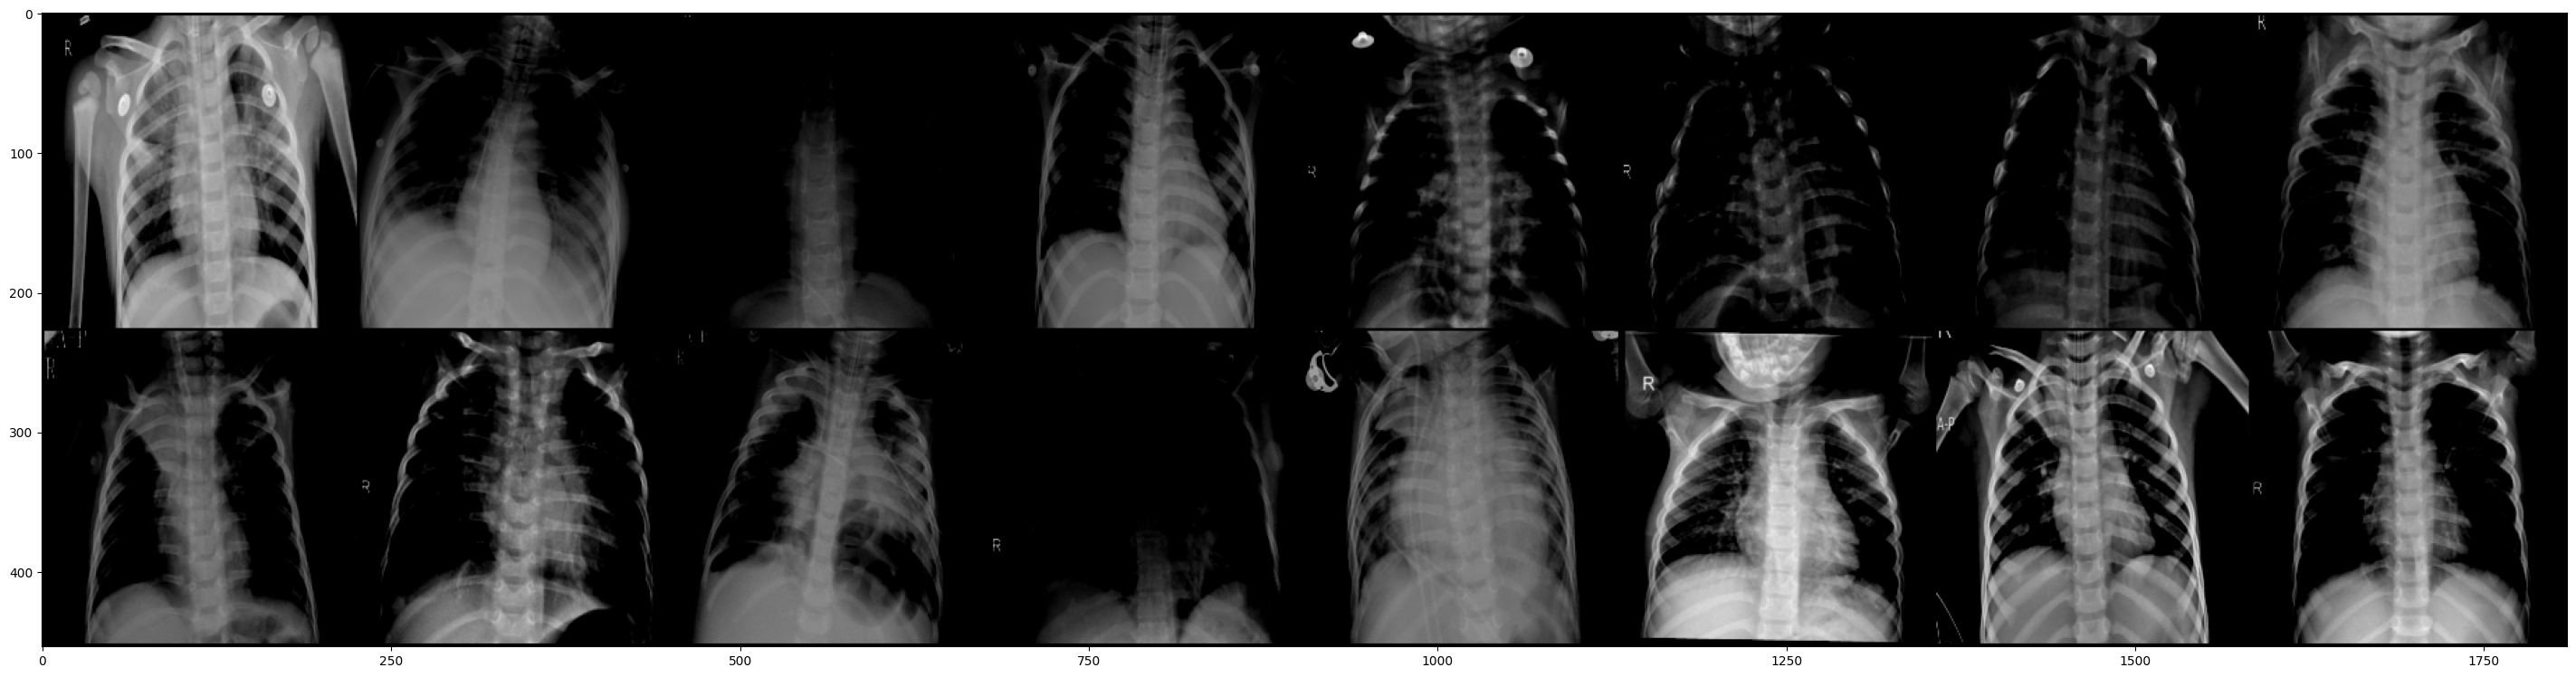

In [4]:
base_data_dir = Path("../data/raw/chest_xray")
image_size = 224
batch_size=16
train_transform = get_train_transforms(image_size,augment=False)
train_dataloader = get_dataloader(os.path.join(base_data_dir,'train'),batch_size,num_workers=0,transform=train_transform)

# grab the first batch of n images
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
# Print the labels
print('Label:', train_labels.numpy())

im = make_grid(train_features, nrow=8)
plt.figure(figsize=(36,12))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))


## apply transforms and visualize

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.992157].


Feature batch shape: torch.Size([16, 1, 224, 224])
Labels batch shape: torch.Size([16])
Label: [1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0]


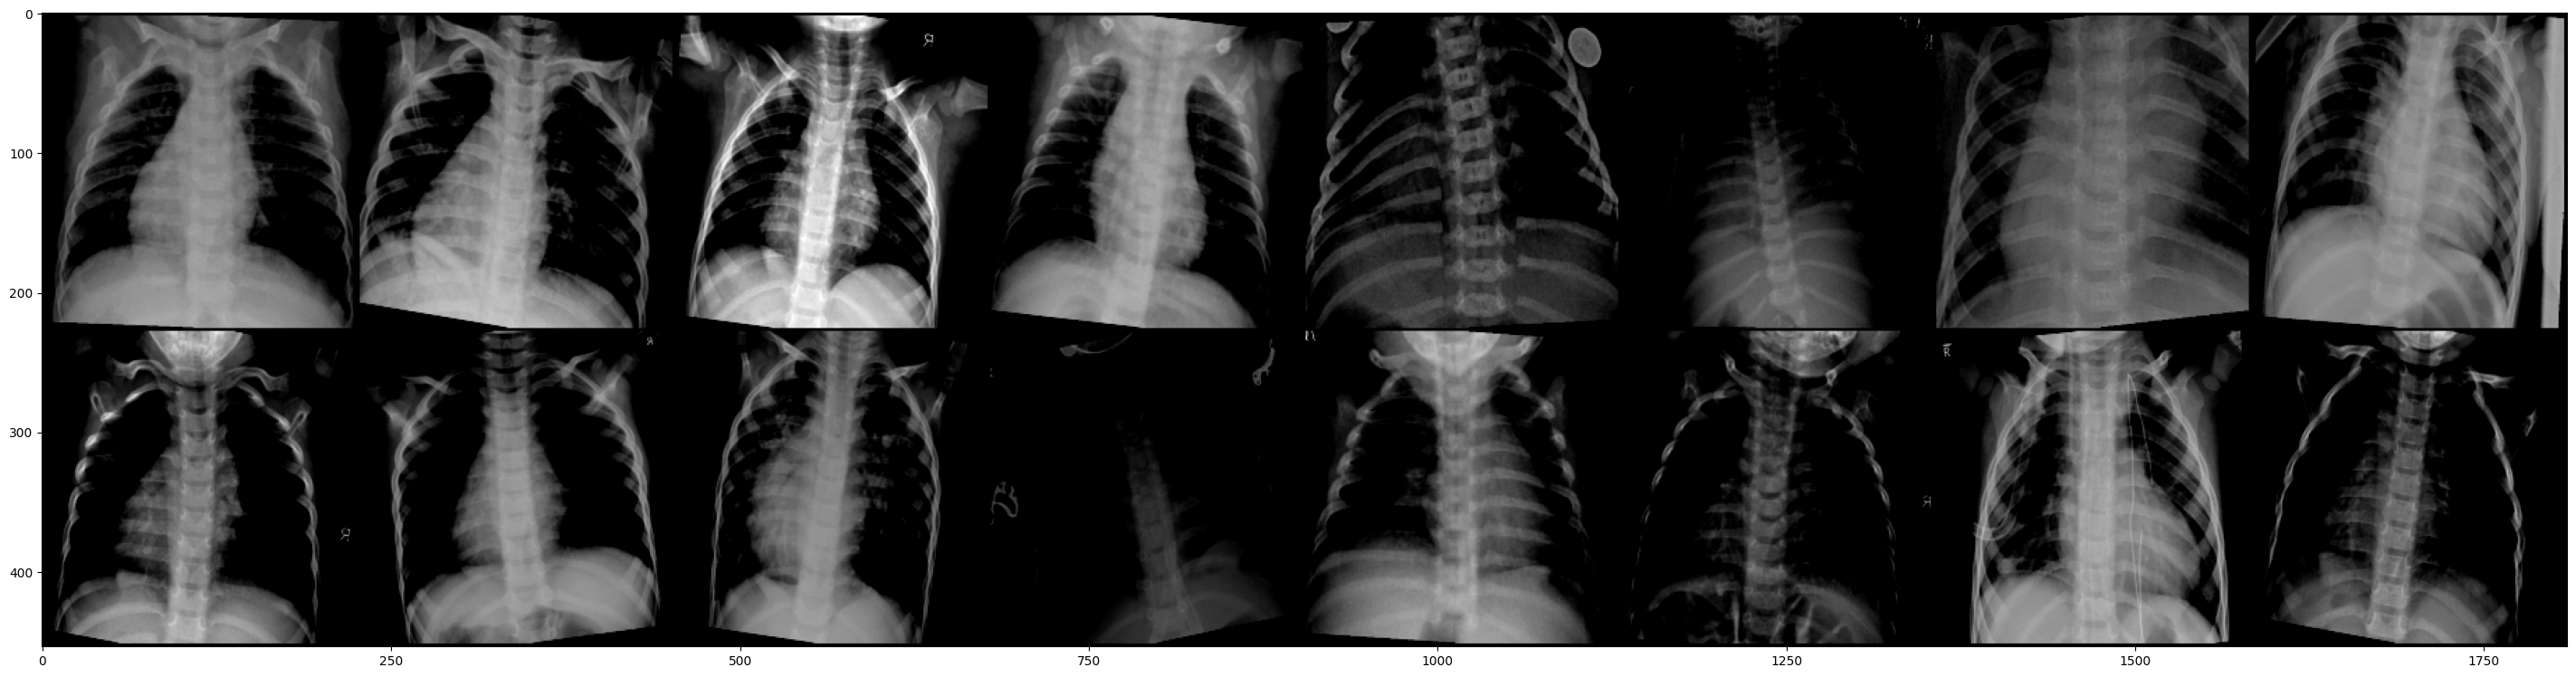

In [8]:
base_data_dir = Path("../data/raw/chest_xray")
image_size = 224
batch_size=16
train_transform = get_train_transforms(image_size,augment=True)
train_dataloader = get_dataloader(os.path.join(base_data_dir,'train'),batch_size,num_workers=0,transform=train_transform)

# grab the first batch of n images
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
# Print the labels
print('Label:', train_labels.numpy())

im = make_grid(train_features, nrow=8)
plt.figure(figsize=(36,12))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))
